In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime
from datetime import timedelta
# sns.set(style="darkgrid")
import requests
import pprint
import re
pd.options.display.max_columns = 999

# Data Preprocessing

In [2]:
df1 = pd.read_csv('./Data/police_killings_cleaned.csv')
df2 = pd.read_csv('./Data/acs2015_census_tract_data.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 34 columns):
name                    467 non-null object
age                     467 non-null int64
gender                  467 non-null object
raceethnicity           467 non-null object
month                   467 non-null object
day                     467 non-null int64
year                    467 non-null int64
streetaddress           463 non-null object
city                    467 non-null object
state                   467 non-null object
latitude                467 non-null float64
longitude               467 non-null float64
state_fp                467 non-null int64
county_fp               467 non-null int64
tract_ce                467 non-null int64
geo_id                  467 non-null int64
county_id               467 non-null int64
namelsad                467 non-null object
lawenforcementagency    467 non-null object
cause                   467 non-null object
armed                

#### 'share_white', 'share_black', 'share_hispanic', 'p_income' and 'pov' are stored as object (strings). 

In [4]:
df1[df1['share_white'].str.match(r'(?!\d)')].loc[:,['share_white','share_black','share_hispanic','p_income','pov']]

,share_white,share_black,share_hispanic,p_income,pov
182,-,-,-,-,-
378,-,-,-,-,-


#### We found it is because of dashes in two rows. So we replaced dashes with NaN and changed data types of those columns to float64.

In [5]:
# replace '-' with NaN
df1[['share_white','share_black','share_hispanic','p_income','pov']] = df1[['share_white','share_black','share_hispanic','p_income','pov']].replace(r'-', np.nan, regex=True)
# change data type to float64
df1[['share_white','share_black','share_hispanic','p_income','pov']] = df1[['share_white','share_black','share_hispanic','p_income','pov']].astype('float64')

#### Merge two datasets

In [6]:
# merge two datasets
df = df1.merge(df2, left_on='geo_id', right_on='CensusTract', how='left')

In [7]:
# see missing data number
df.isnull().sum()[df.isnull().sum() > 0]

streetaddress       4
share_white         2
share_black         2
share_hispanic      2
p_income            2
h_income            2
comp_income         2
county_bucket      27
nat_bucket          2
pov                 2
urate               2
college             2
Hispanic            2
White               2
Black               2
Native              2
Asian               2
Pacific             2
Income              2
IncomeErr           2
IncomePerCap        2
IncomePerCapErr     2
Poverty             2
ChildPoverty        3
Professional        2
Service             2
Office              2
Construction        2
Production          2
Drive               2
Carpool             2
Transit             2
Walk                2
OtherTransp         2
WorkAtHome          2
MeanCommute         2
PrivateWork         2
PublicWork          2
SelfEmployed        2
FamilyWork          2
Unemployment        2
dtype: int64

#### 'county bucket' has 27 missing data, 'streetaddress' has 4, other columns only have 2. Since we already have the income data, we just simply drop the 'county bucket'

In [8]:
# drop 'county_bucket'
df.drop(columns=['county_bucket'],inplace=True)

In [9]:
# show rows with missing data
df[df.isna().any(axis=1)]

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,namelsad,lawenforcementagency,cause,armed,pop,share_white,share_black,share_hispanic,p_income,h_income,county_income,comp_income,nat_bucket,pov,urate,college,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
50,Billy Patrick,30,Male,White,April,26,2015,NaN,Bunch,OK,35.684841,-94.761902,40,1,376800,40001376800,40001,Census Tract 3768,Oklahoma Department of Wildlife Conservation,Gunshot,Firearm,4601,39.3,0.1,1.7,20901.0,35022.0,32556,1.075746,2.0,19.1,0.042686,0.139617,40001376800,Oklahoma,Adair,4584,2380,2204,3.9,40.2,0.4,46.2,0.4,0.0,3422,35159.0,3612.0,18092.0,1464.0,20.6,24.2,29.0,16.1,15.7,19.4,19.8,85.0,10.5,0.2,0.9,0.0,3.4,25.1,1836,61.9,27.1,9.6,1.4,4.6
182,Hashim Abdul-Rasheed,42,Male,Black,January,7,2015,4600 International Gateway,Columbus,OH,39.997512,-82.890052,39,49,980000,39049980000,39049,Census Tract 9800,Columbus Police Department,Gunshot,Firearm,0,NaN,NaN,NaN,NaN,NaN,50877,NaN,NaN,NaN,NaN,NaN,39049980000,Ohio,Franklin,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
280,Kenneth Brown,19,Male,White,January,4,2015,NaN,Guthrie,OK,35.880119,-97.422859,40,83,600200,40083600200,40083,Census Tract 6002,Oklahoma State Police,Gunshot,Non-lethal firearm,3014,68.0,17.4,6.4,16463.0,41901.0,53591,0.781866,2.0,33.3,0.105769,0.105675,40083600200,Oklahoma,Logan,2917,1424,1493,4.0,72.8,13.4,4.4,1.3,0.0,2160,47000.0,5384.0,17024.0,2529.0,28.8,42.3,28.3,28.7,25.7,7.2,10.1,63.3,21.4,1.0,6.2,4.1,4.0,18.3,1226,76.8,14.6,7.5,1.1,7.3
378,Richard White,64,Male,Black,March,20,2015,Louis Armstrong New Orleans International Airp...,Kenner,LA,29.985931,-90.257712,22,51,980000,22051980000,22051,Census Tract 9800,Jefferson Parish Sheriff's Office,Gunshot,Disputed,0,NaN,NaN,NaN,NaN,NaN,48261,NaN,NaN,NaN,NaN,NaN,22051980000,Louisiana,Jefferson,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
379,Ricky Hall,28,Male,Black,March,30,2015,NaN,Fort Meade,MD,39.106651,-76.734802,24,3,740603,24003740603,24003,Census Tract 7406.03,NSA Police Department,Gunshot,Firearm,1610,58.6,25.5,10.0,20995.0,79844.0,87430,0.913233,5.0,3.2,0.095238,0.474940,24003740603,Maryland,Anne Arundel,1827,1245,582,12.7,66.4,10.5,0.0,3.8,0.0,1486,61538.0,10198.0,19282.0,2904.0,0.6,0.0,36.2,19.0,29.0,8.6,7.1,37.1,6.1,1.0,32.8,0.0,23.0,11.6,210,55.2,44.8,0.0,0.0,12.9
405,Santos 'Cuate' Cortez Hernandez,25,Male,Hispanic/Latino,April,20,2015,NaN,Mission,TX,26.215330,-98.325790,48,215,20205,48215020205,48215,Census Tract 202.05,Hidalgo County Sheriff's Office,Gunshot,Firearm,5449,4.8,0.4,94.8,15812.0,32071.0,34146,0.939232,1.0,30.2,0.118734,0.062315,48215020205,Texas,Hidalgo,5489,2475,3014,92.9,6.4,0.7,0.0,0.0,0.0,2829,31653.0,6026.0,12769.0,1408.0,24.9,27.0,19.0,18.3,32.9,15.5,14.4,82.6,11.3,0.0,0.0,3.6,2.6,17.8,2021,79.5,12.4,8.1,0.0,11.5
415,Sheldon Haleck,39,Male,Asian/Pacific Islander,March,16,2015,364 S King St,Honolulu,HI,21.306513,-157.859866,15,3,3900,15003003900,15003,Census Tract 39,Honolulu Police Department,Taser,No,403,26.1,13.4,2.0,21509.0,25323.0,72764,0.348016,1.0,20.1,0.231788,0.272237,15003003900,Hawaii,Honolulu,330,199,131,4.5,19.7,11.5,0.0,51.2,7.3,283,25655.0,2988.0,35333.0,9577.0,16.7,NaN,54.8,30.8,10.6,0.0,3.8,60.6,0.0,14.4,11.5,13.5,0.0,22.9,104,61.5,30.8,7.7,0.0,18.1


#### Two rows have all census data missing. From the street address, we found they are both airports. That's why nobody lives there. We decided to use the mean of data of the same county to impute them. (The Louisana one doesn't have another data point in the same city, so I use the mean of the Louisana state in the police killing dataset)

In [10]:
# impute missing data of two airport locations
df.iloc[182,36:] = df2[(df2['State']=='Ohio')&(df2['County']=='Franklin')].mean()[1:]
df.iloc[182,21:33] = df1[(df1['state']=='OH')&(df1['city']=='Columbus')].drop(columns=['county_bucket']).mean()[-12:]

df.iloc[378,36:] = df2[(df2['State']=='Louisiana')&(df2['County']=='Jefferson')].mean()[1:]
df.iloc[378,21:33] = df1[(df1['state']=='LA')].drop(columns=['county_bucket']).mean()[-12:]


In [11]:
# show rows with missing data now
df[df.isna().any(axis=1)]

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,namelsad,lawenforcementagency,cause,armed,pop,share_white,share_black,share_hispanic,p_income,h_income,county_income,comp_income,nat_bucket,pov,urate,college,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
50,Billy Patrick,30,Male,White,April,26,2015,NaN,Bunch,OK,35.684841,-94.761902,40,1,376800,40001376800,40001,Census Tract 3768,Oklahoma Department of Wildlife Conservation,Gunshot,Firearm,4601.0,39.3,0.1,1.7,20901.0,35022.0,32556.0,1.075746,2.0,19.1,0.042686,0.139617,40001376800,Oklahoma,Adair,4584.0,2380.0,2204.0,3.9,40.2,0.4,46.2,0.4,0.0,3422.0,35159.0,3612.0,18092.0,1464.0,20.6,24.2,29.0,16.1,15.7,19.4,19.8,85.0,10.5,0.2,0.9,0.0,3.4,25.1,1836.0,61.9,27.1,9.6,1.4,4.6
280,Kenneth Brown,19,Male,White,January,4,2015,NaN,Guthrie,OK,35.880119,-97.422859,40,83,600200,40083600200,40083,Census Tract 6002,Oklahoma State Police,Gunshot,Non-lethal firearm,3014.0,68.0,17.4,6.4,16463.0,41901.0,53591.0,0.781866,2.0,33.3,0.105769,0.105675,40083600200,Oklahoma,Logan,2917.0,1424.0,1493.0,4.0,72.8,13.4,4.4,1.3,0.0,2160.0,47000.0,5384.0,17024.0,2529.0,28.8,42.3,28.3,28.7,25.7,7.2,10.1,63.3,21.4,1.0,6.2,4.1,4.0,18.3,1226.0,76.8,14.6,7.5,1.1,7.3
379,Ricky Hall,28,Male,Black,March,30,2015,NaN,Fort Meade,MD,39.106651,-76.734802,24,3,740603,24003740603,24003,Census Tract 7406.03,NSA Police Department,Gunshot,Firearm,1610.0,58.6,25.5,10.0,20995.0,79844.0,87430.0,0.913233,5.0,3.2,0.095238,0.474940,24003740603,Maryland,Anne Arundel,1827.0,1245.0,582.0,12.7,66.4,10.5,0.0,3.8,0.0,1486.0,61538.0,10198.0,19282.0,2904.0,0.6,0.0,36.2,19.0,29.0,8.6,7.1,37.1,6.1,1.0,32.8,0.0,23.0,11.6,210.0,55.2,44.8,0.0,0.0,12.9
405,Santos 'Cuate' Cortez Hernandez,25,Male,Hispanic/Latino,April,20,2015,NaN,Mission,TX,26.215330,-98.325790,48,215,20205,48215020205,48215,Census Tract 202.05,Hidalgo County Sheriff's Office,Gunshot,Firearm,5449.0,4.8,0.4,94.8,15812.0,32071.0,34146.0,0.939232,1.0,30.2,0.118734,0.062315,48215020205,Texas,Hidalgo,5489.0,2475.0,3014.0,92.9,6.4,0.7,0.0,0.0,0.0,2829.0,31653.0,6026.0,12769.0,1408.0,24.9,27.0,19.0,18.3,32.9,15.5,14.4,82.6,11.3,0.0,0.0,3.6,2.6,17.8,2021.0,79.5,12.4,8.1,0.0,11.5
415,Sheldon Haleck,39,Male,Asian/Pacific Islander,March,16,2015,364 S King St,Honolulu,HI,21.306513,-157.859866,15,3,3900,15003003900,15003,Census Tract 39,Honolulu Police Department,Taser,No,403.0,26.1,13.4,2.0,21509.0,25323.0,72764.0,0.348016,1.0,20.1,0.231788,0.272237,15003003900,Hawaii,Honolulu,330.0,199.0,131.0,4.5,19.7,11.5,0.0,51.2,7.3,283.0,25655.0,2988.0,35333.0,9577.0,16.7,NaN,54.8,30.8,10.6,0.0,3.8,60.6,0.0,14.4,11.5,13.5,0.0,22.9,104.0,61.5,30.8,7.7,0.0,18.1


#### Now there are 5 data points with missing data. Four of them miss 'streetaddress', this doesn't seem useful, so we can just drop 'streetaddress' later. The last one misses 'ChildPoverty'. Because the total population of last census district is only 330, so there may not be a child. We just simply put 0 to the 'ChildPoverty' there. 

In [12]:
# put 0 to the missing 'ChildPoverty'
df.loc[415, 'ChildPoverty'] = 0

#### There are many conflictions between the census data in the police killing dataset and the census dataset, such as 'pop' and 'TotalPop', etc. So we just drop 'pop','share_white', 'share_black' and 'share_hispanic' in the police killing dataset. 

In [13]:
# drop columns
# drop conflicted census data from the police killing dataset
df.drop(columns=['name','month','day','year','streetaddress',\
                'city','state','latitude','longitude','state_fp','county_fp',\
                'tract_ce','geo_id','county_id','namelsad','lawenforcementagency',\
                'nat_bucket','CensusTract','County','pop','share_white',\
                'share_black','share_hispanic','Women'],inplace=True)

In [14]:
df.head()

,age,gender,raceethnicity,cause,armed,p_income,h_income,county_income,comp_income,pov,urate,college,State,TotalPop,Men,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,17,Male,Black,Gunshot,No,28375.0,51367.0,54766.0,0.937936,14.1,0.097686,0.168510,Alabama,3845.0,1845.0,7.9,64.8,26.6,0.0,0.3,0.0,2901.0,46688.0,3929.0,22263.0,2330.0,16.2,27.1,26.1,22.5,23.2,11.2,16.9,81.2,11.3,0.0,0.0,7.1,0.4,30.1,1847.0,71.5,22.0,6.5,0.0,9.1
1,28,Male,White,Gunshot,No,14678.0,27972.0,40930.0,0.683411,28.8,0.065724,0.111402,Louisiana,2481.0,1377.0,1.1,46.0,47.1,0.0,2.5,0.0,1981.0,20286.0,3427.0,13274.0,2020.0,36.3,63.2,16.4,45.0,11.6,3.2,23.8,60.2,19.1,9.3,5.6,3.3,2.5,17.8,871.0,75.4,18.7,5.9,0.0,9.1
2,27,Male,White,Gunshot,No,25286.0,45365.0,54930.0,0.825869,14.6,0.166293,0.147312,Wisconsin,4092.0,2142.0,31.1,56.7,10.5,0.0,1.3,0.0,2612.0,42330.0,9799.0,17033.0,1825.0,21.3,33.1,24.9,15.0,25.0,11.9,23.3,82.2,8.5,1.9,3.7,3.4,0.3,23.8,1759.0,90.6,7.3,2.2,0.0,12.4
3,26,Male,Hispanic/Latino,Gunshot,Firearm,17194.0,48295.0,55909.0,0.863814,11.7,0.124827,0.050133,California,4593.0,2176.0,98.3,1.1,0.6,0.0,0.0,0.0,2200.0,42206.0,7457.0,14322.0,1640.0,16.7,23.8,22.0,29.0,17.0,8.3,23.8,69.0,14.6,5.8,2.6,4.7,3.4,30.4,1890.0,82.9,7.8,9.3,0.0,9.3
4,30,Male,White,Gunshot,No,33954.0,68785.0,49669.0,1.384868,1.9,0.063550,0.403954,Ohio,6493.0,3260.0,1.1,93.1,1.6,0.0,4.1,0.0,5116.0,64586.0,13018.0,35215.0,4569.0,2.6,1.5,46.1,19.7,23.8,3.7,6.7,89.8,4.6,1.2,2.7,0.4,1.3,22.6,3433.0,80.9,15.5,3.3,0.3,4.4


#### Since the aim is going to see if there is a bias towards black people, we use the binary output ('Black' and 'Non-black') in our models.

In [15]:
df.raceethnicity = df.raceethnicity.str.replace(r'^(?!Black).*','Non-black')

In [16]:
df.to_csv('cleaned_df.csv',index=False)

# Model Building

### Since we only have people who are killed by the police. We are not able to predict if a person is going to be killed by police or not. The only thing we can predict is the race of a person killed by police given other information we have. Thus, the output of our model is the 'raceethnicity', which is a multi-class categorical variable. The input will be other covariates, some of them are categorical, some of them are numerical. 

#### First we need to pop out the 'raceethinicity' as an output. Then we need to do one-hot encoding for categorical variables. 

In [17]:
y = df.pop('raceethnicity')
X = pd.get_dummies(df)

## Logistic Regression

#### The model is using 10-fold cross-validation. 

In [18]:
from sklearn.linear_model import LogisticRegressionCV

In [19]:
%%time
clf_logistic = LogisticRegressionCV(cv=10,random_state=0,solver='liblinear',max_iter=100).fit(X, y)

Wall time: 1.22 s


In [20]:
y_pred = clf_logistic.predict(X)
np.unique(y_pred,return_counts=True)

(array(['Black', 'Non-black'], dtype=object), array([ 73, 394], dtype=int64))

In [21]:
y.value_counts()

Non-black    332
Black        135
Name: raceethnicity, dtype: int64

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
confusion_matrix(y, y_pred, labels=['Black', 'Non-black'])

array([[ 59,  76],
       [ 14, 318]], dtype=int64)

In [24]:
from sklearn.metrics import roc_curve, auc

In [25]:
y_score = clf_logistic.decision_function(X)
y_labels = (y=='Non-black') - 0

In [26]:
fpr, tpr, threshold = roc_curve(y_labels, y_score)
roc_auc = auc(fpr, tpr)

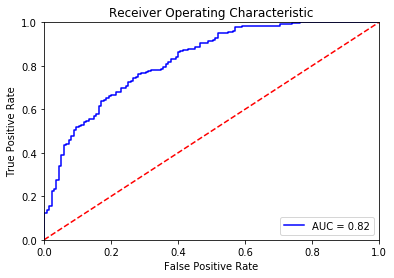

In [27]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### The fitted model predict 83 'Black'. The true 'Black' count is 135, which is about 63% higher than the predicted value. 

### Use the features selected by glm in R

In [28]:
column_list = ['age', 'cause', 'State', 'Black']
X_filtered = pd.get_dummies(df[column_list])

In [29]:
%%time
clf_logistic_filtered = LogisticRegressionCV(cv=10,random_state=0,solver='liblinear',max_iter=100,scoring='balanced_accuracy').fit(X_filtered, y)

Wall time: 102 ms


In [30]:
np.unique(clf_logistic_filtered.predict(X_filtered),return_counts=True)

(array(['Black', 'Non-black'], dtype=object), array([102, 365], dtype=int64))

In [31]:
y.value_counts()

Non-black    332
Black        135
Name: raceethnicity, dtype: int64

In [32]:
y_pred = clf_logistic_filtered.predict(X_filtered)
np.unique(y_pred,return_counts=True)

(array(['Black', 'Non-black'], dtype=object), array([102, 365], dtype=int64))

In [33]:
y.value_counts()

Non-black    332
Black        135
Name: raceethnicity, dtype: int64

In [34]:
confusion_matrix(y, y_pred, labels=['Black', 'Non-black'])

array([[ 79,  56],
       [ 23, 309]], dtype=int64)

In [35]:
y_score = clf_logistic_filtered.decision_function(X_filtered)
y_labels = (y=='Non-black') - 0

In [36]:
fpr, tpr, threshold = roc_curve(y_labels, y_score)
roc_auc = auc(fpr, tpr)

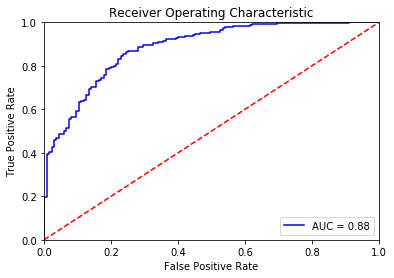

In [37]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Monte Carlo Simulation of cross validation results

In [38]:
from sklearn.model_selection import KFold

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
def logistic_CV(X,y,nfolds,rs):
    # logistic regression model from cross validation
    # return True Positive, False Positive, True Negative, False Negative (Positive is Black)
    clf = LogisticRegression(solver='liblinear',random_state=rs)
    kf = KFold(n_splits=nfolds,random_state=rs,shuffle=True)
    if isinstance(X,pd.DataFrame):
        X = X.values
    if isinstance(y,pd.DataFrame):
        y = y.values
    conf_matx = np.array([[0,0],[0,0]])
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        conf_matx += confusion_matrix(y_test, y_pred, labels=['Black', 'Non-black'])
    return conf_matx[0,0], conf_matx[1,0], conf_matx[1,1], conf_matx[0,1]

In [41]:
%%time
n = 10000
nfolds = 10
TP = []
FP = []
TN = []
FN = []
for i in range(n):
    tp, fp, tn, fn = logistic_CV(X_filtered, y, nfolds,i)
    TP.append(tp)
    FP.append(fp)
    TN.append(tn)
    FN.append(fn)


Wall time: 3min 36s


(array([2.000e+00, 2.600e+01, 2.980e+02, 5.470e+02, 2.584e+03, 3.838e+03,
        1.407e+03, 1.146e+03, 1.470e+02, 5.000e+00]),
 array([80. , 81.7, 83.4, 85.1, 86.8, 88.5, 90.2, 91.9, 93.6, 95.3, 97. ]),
 <a list of 10 Patch objects>)

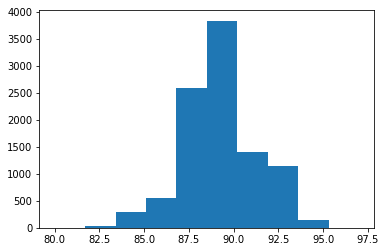

In [42]:
pred_black = np.array(TP) + np.array(FP)
plt.hist(pred_black)

By central limit theorem, the distribution of n predicted values (independent random variables) will tend towards a normal distribution $N(\mu,\sigma^2)$ when n is large. Thus, we can calculate the p-value of the true value 135 in this distribution. 
$$\text{p-value}=1-\Phi(\frac{135-\mu}{\sigma})$$

In [43]:
from scipy.stats import norm

In [44]:
mu = np.mean(pred_black)
sigma = np.std(pred_black)
true_black = (y=='Black').sum()
p_value = 1-norm.cdf((true_black-mu)/sigma)
p_value

0.0

The calculation exceeds the precision of scipy. From high accuracy calculator online, the p-value is about $1.35\times 10^{-114}$

#### Model coefficients

Build 5 models from 5-fold cross validation and average their coefficients.

In [45]:
nfolds = 5
clf = LogisticRegression(solver='liblinear',random_state=0)
kf = KFold(n_splits=nfolds,random_state=0,shuffle=True)
coef_list = np.zeros(X_filtered.columns.shape[0]+1)
for train_index, test_index in kf.split(X_filtered):
        X_train, X_test = X_filtered.values[train_index], X_filtered.values[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train,y_train)
        coef_list += np.concatenate([clf.intercept_,clf.coef_[0]], axis=0)
coef_list /= nfolds

In [46]:
variable_list = ['intercept']
variable_list.extend(X_filtered.columns.tolist())

In [47]:
coef_df = pd.DataFrame({'Covariates':variable_list, 'Coefficients':coef_list})
coef_df

,Covariates,Coefficients
0,intercept,0.174145
1,age,0.038503
2,Black,-0.054950
3,cause_Death in custody,-0.929173
4,cause_Gunshot,0.568124
5,cause_Struck by vehicle,0.320171
6,cause_Taser,-0.138299
7,cause_Unknown,0.353323
8,State_Alabama,-0.709543
9,State_Alaska,0.433717


## KNN Classifier

#### Since the KNN is calculating the Euclidean distance between the points, the input data are standardized. 

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#### Since the KNN doesn't have built-in CV model, we have to do train test split. 

In [49]:
X_scaled = preprocessing.scale(X)

C:\Users\Qingyu\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

#### Grid search the best n_neighbors

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
def gridsearch(model,param_grid,X,y,nfolds):
    grid_search = GridSearchCV(model, param_grid, cv=nfolds,scoring='balanced_accuracy')
    grid_search.fit(X, y)
    print(grid_search.best_params_)
    return grid_search.best_estimator_

In [53]:
nfolds = 5
param_grid = {'n_neighbors': list(range(1,20))}
clf_knn = gridsearch(KNeighborsClassifier(),param_grid,X_scaled,y,nfolds)

{'n_neighbors': 4}


C:\Users\Qingyu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [54]:
from sklearn.model_selection import KFold

In [55]:
def model_cross_validation_result(model,X,y,nfolds):
    kf = KFold(n_splits=nfolds,random_state=0,shuffle=True)
    TP = []
    FP = []
    TN = []
    FN = []
    if isinstance(X,pd.DataFrame):
        X = X.values
    if isinstance(y,pd.DataFrame):
        y = y.values
    conf_matx = np.array([[0,0],[0,0]])
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        conf_matx += confusion_matrix(y_test, y_pred, labels=['Black', 'Non-black'])
        
    
    print(conf_matx)
    

In [56]:
model_cross_validation_result(clf_knn,X_scaled,y,nfolds)

[[ 53  82]
 [ 77 255]]


## SVM Classifier

In [57]:
from sklearn.svm import SVC

In [58]:
nfolds = 5
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}

clf_svm = gridsearch(SVC(kernel='rbf'),param_grid,X,y,nfolds)

{'C': 1, 'gamma': 0.001}


#### The best C is 1, gamma is 0.001.

In [59]:
model_cross_validation_result(clf_svm,X,y,5)

[[  4 131]
 [  1 331]]


#### SVM classifier almost predicts everybody Non-black

## Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
nfolds = 5
min_samples_split = [2,4,8,16]
min_samples_leaf = [1,2,4]
param_grid = {'min_samples_split': min_samples_split, 'min_samples_leaf' : min_samples_leaf}

clf_dt = gridsearch(DecisionTreeClassifier(random_state=0),param_grid,X,y,nfolds)

{'min_samples_leaf': 1, 'min_samples_split': 2}


In [62]:
model_cross_validation_result(clf_dt,X,y,5)

[[ 70  65]
 [ 70 262]]


In [63]:
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG

In [64]:
labels = X.columns

In [65]:
# use "$ dot -Tpng tree.dot -o tree.png"   to convert to PNG format
export_graphviz(clf_dt, out_file='tree.dot',\
                               feature_names=labels, class_names=['Black', 'Non-black'],\
                               filled = True)

### Decesion Tree On filtered data

In [66]:
nfolds = 5
min_samples_split = [2,4,8,16]
min_samples_leaf = [1,2,4]
max_depth = [6,8,10,12,14,16,18,20]
max_features = ['sqrt','log2']
param_grid = {'min_samples_split': min_samples_split, 'min_samples_leaf' : min_samples_leaf,
              'max_depth' : max_depth, 'max_features': max_features}

clf_dt = gridsearch(DecisionTreeClassifier(random_state=0),param_grid,X_filtered,y,nfolds)

{'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8}


C:\Users\Qingyu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [67]:
model_cross_validation_result(clf_dt,X_filtered,y,5)

[[ 59  76]
 [ 45 287]]


In [68]:
labels = X_filtered.columns

In [69]:
export_graphviz(clf_dt, out_file='tree_filtered_2.dot',\
                               feature_names=labels, class_names=['Black', 'Non-black'],\
                               filled = True)